In [1]:
# 1 Initialization
import numpy as np
import scipy.integrate as integrate
import skimage
import matplotlib.pyplot as plt
import matplotlib.colors as c
import os
import cv2
import mpmath
from astropy.io import fits
from datetime import datetime
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from IPython.display import clear_output
import sympy as sp

In [2]:
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rc('font', **font)
plt.rc('axes', unicode_minus = False)

import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import PowerNorm

# Adjusted function to lighten a color
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by mixing it with white.

    Parameters:
    - color: The color to lighten. Can be a named color, a hex color, or an RGB tuple.
    - amount: The amount to lighten the color. 0 means no change, 1 means fully lightened to white.
    
    Returns:
    - The lightened color as an RGB tuple.
    """
    # Convert the named color to an RGB tuple
    rgb = np.array(mcolors.to_rgb(color))
    # Calculate the lightened color by adding the white color proportionally
    lightened_rgb = rgb + (np.array([1, 1, 1]) - rgb) * amount
    
    # Ensure the RGB values are within the valid range [0, 1]
    lightened_rgb = np.clip(lightened_rgb, 0, 1)
    
    return tuple(lightened_rgb)

# Example usage to lighten the color red
light_red = lighten_color('red', amount=0.5)  # Lighten by 50%
light_green = lighten_color('green', amount=0.5)  # Lighten by 50%
light_blue = lighten_color('blue', amount=0.5)  # Lighten by 50%
light_purple = lighten_color('purple', amount=0.5)  # Lighten by 50%
light_orange = lighten_color('orange', amount=0.5)  # Lighten by 50%

In [4]:
hst_image = fits.open("80_raw_2.fits")[0].data[0]
real_half_resolution = 176

x_array = np.linspace(-real_half_resolution * 0.04612391098591937, real_half_resolution * 0.04612391098591937, real_half_resolution * 2 + 1)

center_x = 412
center_y = 407

start_x = 150 + np.sin(105 * np.pi / 180) * 8.175 / 0.04612391098591937
end_x = 150 - np.sin(105 * np.pi / 180) * 8.175 / 0.04612391098591937
start_y = 150 + np.cos(105 * np.pi / 180) * 8.175 / 0.04612391098591937
end_y = 150 - np.cos(105 * np.pi / 180) * 8.175 / 0.04612391098591937

y_hst = skimage.measure.profile_line(hst_image[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], [start_x, start_y], [end_x, end_y], linewidth = 3)
x_hst = np.linspace(-(len(y_hst) - 1) / 2 *  0.04612391098591937, (len(y_hst) - 1) / 2 *  0.04612391098591937, len(y_hst))
y_hst = np.delete(y_hst, int(len(y_hst) / 2))
y_hst = np.insert(y_hst, int(len(y_hst) / 2), hst_image[center_x, center_y])
x_hst = np.delete(x_hst, int(len(y_hst) / 2))
x_hst = np.insert(x_hst, int(len(y_hst) / 2), 0)

y_hst_scaled = np.interp(x_array, x_hst, y_hst)[::-1]

x_array_hst = x_array
normalizedYHST = y_hst_scaled / np.max(np.nan_to_num(np.array(y_hst_scaled, dtype = float)))

/tmp/ipykernel_2962753/1951990193.py:13: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(1, 3, figsize = (17, 5))


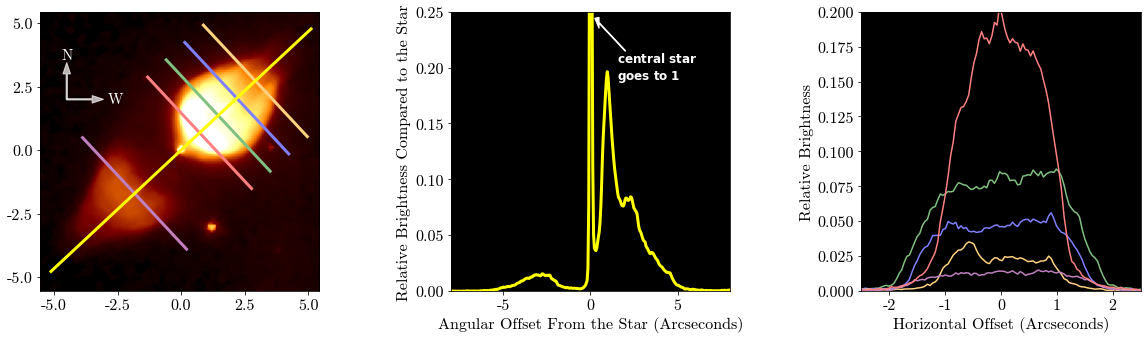

In [15]:
from matplotlib.colors import PowerNorm
from math import sqrt, sin, cos, acos, atan, tanh
pi = 3.14159265358979323846
pixel_size = 0.1

center_x = 686
center_y = 1027

angle_degrees = 43

data = fits.open("cleaned_image.fits")[0].data

fig, axes = plt.subplots(1, 3, figsize = (17, 5))

plt.rcParams.update({'font.size': 16})

angular_size = 3

display_half_size = 55

axes[0].imshow(data[center_x - display_half_size : center_x + display_half_size, center_y - display_half_size : center_y + display_half_size], norm = PowerNorm(0.5, vmin = 0, vmax = 10), cmap = 'afmhot', origin = 'lower')

offset = -2

start_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_green, linewidth = 3)

offset = -3

start_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_blue, linewidth = 3)

offset = -4

start_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_orange, linewidth = 3)

offset = -1

start_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_red, linewidth = 3)

offset = 2.5

start_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = display_half_size - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = display_half_size - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_purple, linewidth = 3)

angular_size = 7

start_y = display_half_size + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1
end_y = display_half_size - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1
start_x = display_half_size + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1
end_x = display_half_size - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)

axes[0].set_aspect('equal', 'box')

text_size = 15
arrow_length = 10

axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center', fontsize = text_size)

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'W', color = 'white', va = 'center', fontsize = text_size)


# axes[0].axis('off')

axes[0].set_xticks(ticks = np.linspace(display_half_size - 5 / (0.1), display_half_size + 5 / (0.1), 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(display_half_size - 5 / (0.1), display_half_size + 5 / (0.1), 5), labels = np.around(np.linspace(-5, 5, 5), 2))

axes[1].plot(x_array_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[1].set_xlim(-8, 8)
axes[1].set_ylim(0, 0.25)

axes[1].annotate("$\mathbf{central\ star}$\n$\mathbf{goes\ to\ 1}$", 
                 xy = (1.5, 0.19), 
                 fontsize = 12,
                 color = 'white')

# Draw the arrow separately using arrow
axes[1].arrow(2, 0.215, -1.5, 0.025, 
              head_width = 0.01, 
              head_length = 0.25, 
              fc = 'white', 
              ec = 'white')

axes[1].set_xlabel('Angular Offset From the Star (Arcseconds)')
axes[1].set_ylabel('Relative Brightness Compared to the Star')

# axes[1].set_aspect(np.max(x_hst) * 2 / 0.2, 'box')
axes[1].set_facecolor('black')

axes[1].set_aspect(64, adjustable = 'box')

angular_size = 3

offset = -2

data = fits.open("f547m_80s_raw_1.fits")[0].data[0]

center_x = 412
center_y = 407
pixel_size = (0.1013 / 2.196257815841434)
angle_degrees = 105

offset = -2

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_green)

offset = -3

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_blue)

offset = -4

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_orange)

offset = 2.5

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_purple)

offset = -1

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_red)

# axes[2].set_title("Brightness of the Equilateral Profiles Relative to Star")
axes[2].set_ylabel("Relative Brightness")
axes[2].set_xlabel("Horizontal Offset (Arcseconds)")
axes[2].set_xlim(-2.5, 2.5)
axes[2].set_ylim(0, 0.2)
axes[2].set_facecolor('black')

axes[2].set_aspect(25, adjustable='box')

fig.tight_layout()

fig.savefig('HST M1-92-profiles-display.png', dpi = 100)

fig.show()

/tmp/ipykernel_2962753/3681957276.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize = (30, 30))


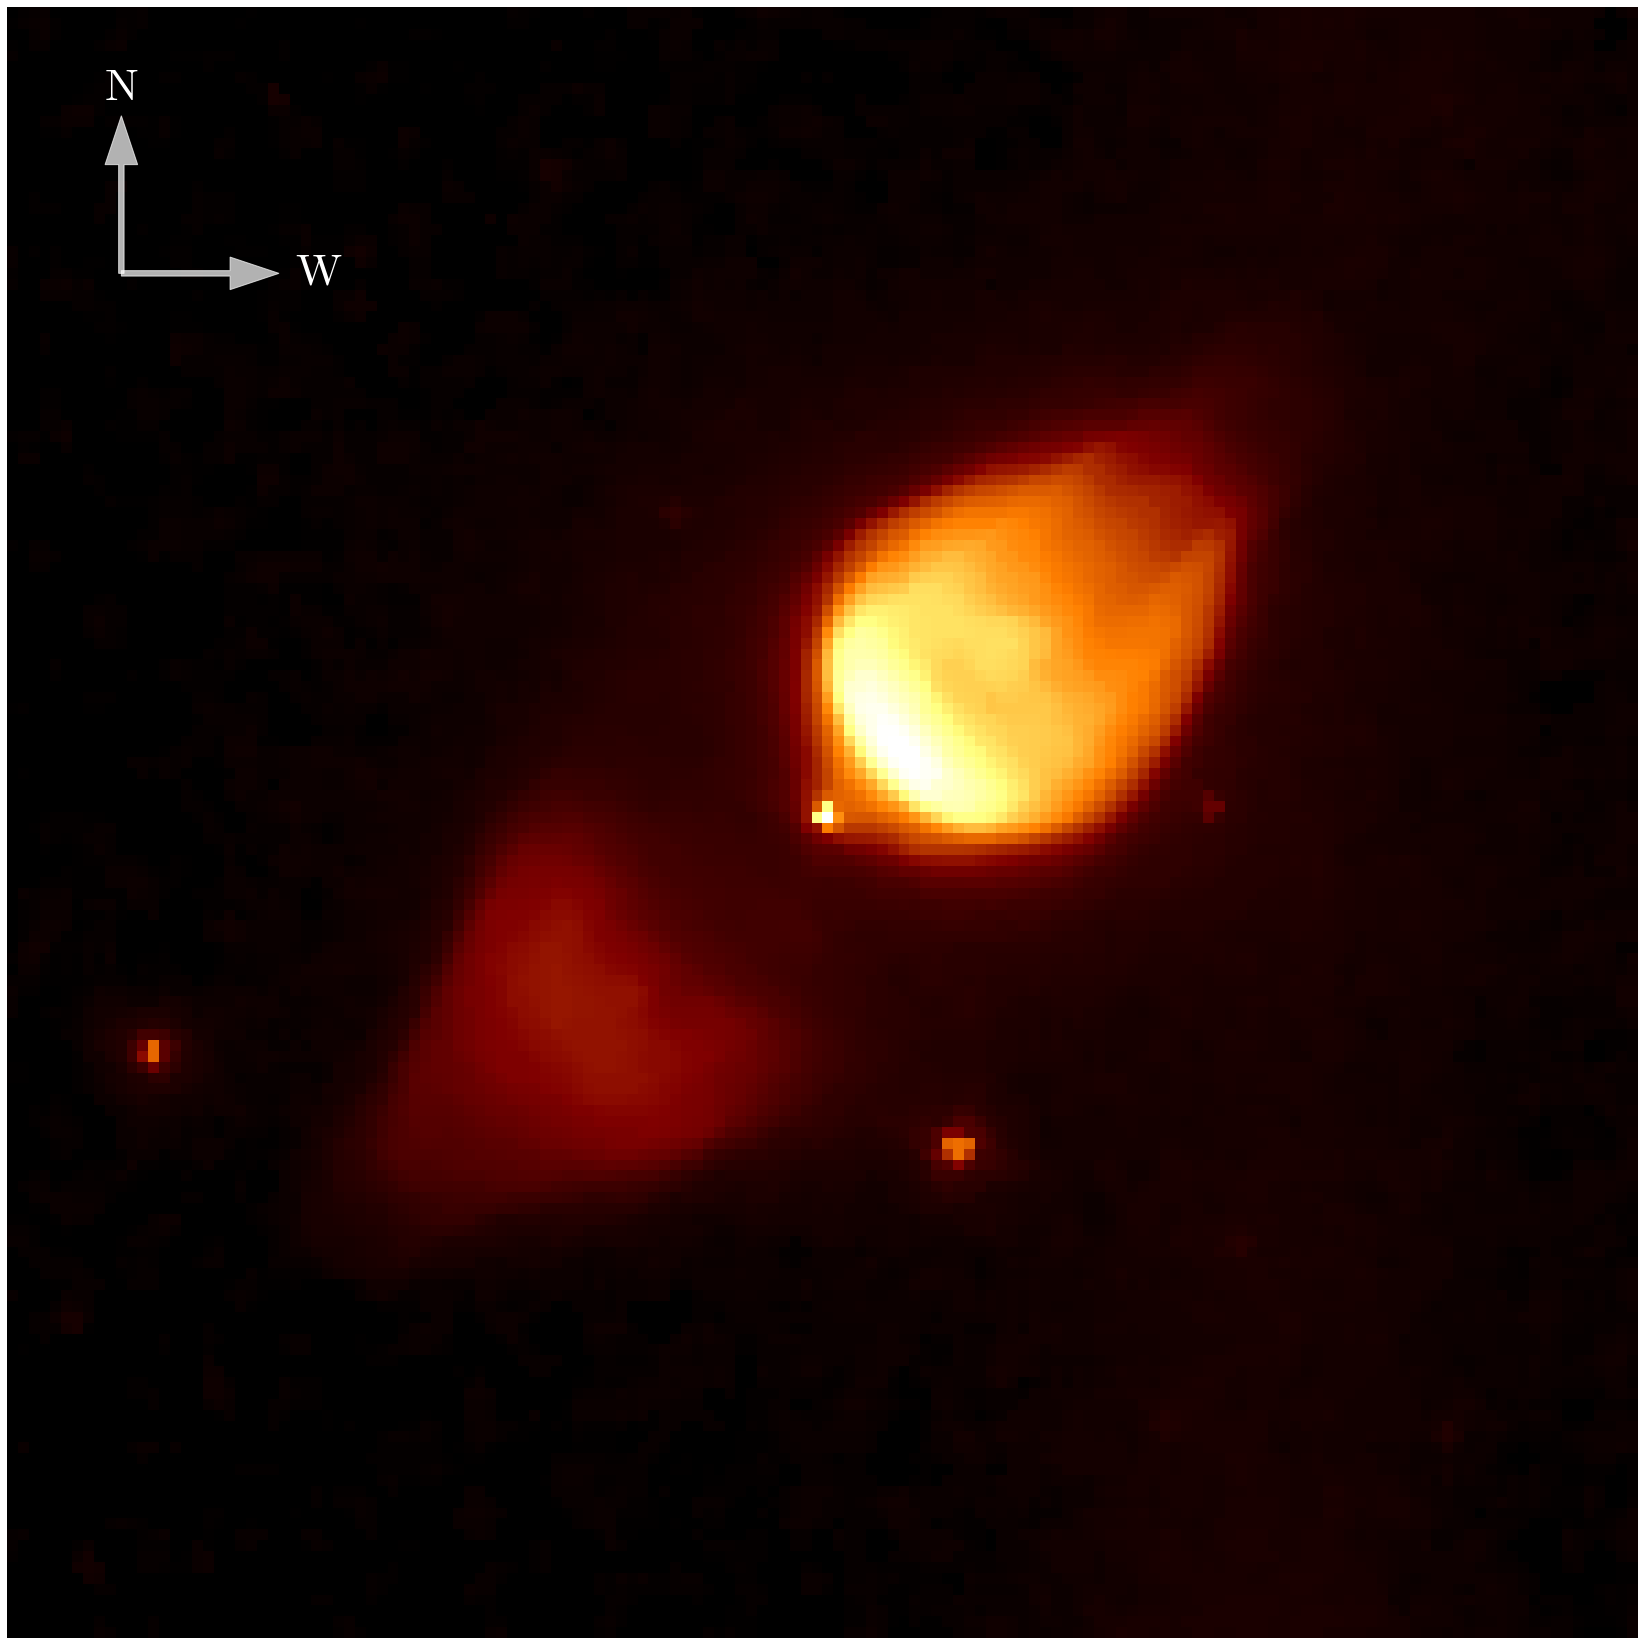

In [16]:
fig, ax = plt.subplots(figsize = (30, 30))
ax.set_aspect('equal')

from matplotlib.colors import PowerNorm

data = fits.open("cleaned_image.fits")[0].data

center_x = 686
center_y = 1027

plt.imshow(data[center_x - 75 : center_x + 75, center_y - 75 : center_y + 75], norm = PowerNorm(0.5, vmin = 0, vmax = 20), cmap = 'afmhot', origin = 'lower')

plt.arrow(10, 125, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
plt.text(10, 130 + arrow_length + 1, 'N', color = 'white', ha = 'center', fontsize = text_size * 3)

plt.arrow(10, 125, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
plt.text(15 + arrow_length + 1, 125, 'W', color = 'white', va = 'center', fontsize = text_size * 3)


plt.axis('off')
plt.show()

In [17]:
hdul = fits.open("F547M.fits")
data_547 = hdul[0].data
hdul = fits.open("F222M.fits")
data_222 = hdul[1].data
hdul = fits.open("F165M.fits")
data_165 = hdul[1].data

for i in range(len(data_165)):
    for j in range(len(data_165[0])):
        if np.abs(data_165[i][j] - 14438) <= 1:
            print(i, j)

center_x_165 = 181
center_y_165 = 121

for i in range(len(data_222)):
    for j in range(len(data_222[0])):
        if np.abs(data_222[i][j] - 27491) <= 1:
            print(i, j)
            
center_x_222 = 181
center_y_222 = 121
            
for i in range(len(data_547)):
    for j in range(len(data_547[0])):
        if np.abs(data_547[i][j] - 78) <= 1:
            print(i, j)

center_x_547 = 954
center_y_547 = 968

min_val = 0
max_val = 30

data_165[data_165 < min_val] = min_val
data_165[data_165 > max_val] = max_val

data_165 = (data_165 / np.amax(data_165) * 255).astype('uint8')

min_val = 0
max_val = 30

data_222[data_222 < min_val] = min_val
data_222[data_222 > max_val] = max_val

data_222 = (data_222 / np.amax(data_222) * 255).astype('uint8')

min_val = 0
max_val = 2

data_547[data_547 < min_val] = min_val
data_547[data_547 > max_val] = max_val

data_547 = (data_547 / np.amax(data_547) * 255).astype('uint8')

181 121
181 121
954 968


In [18]:
plt.hist(flatten(data_165))

NameError: name 'flatten' is not defined

In [ ]:
angle_degrees = 11
scale = 1 / 1.3335
rotation_matrix_165 = cv2.getRotationMatrix2D((center_x_165, center_y_165), angle_degrees, scale)

rotated_data_165 = cv2.warpAffine(
    data_165,
    rotation_matrix_165,
    (int(data_165.shape[1] * scale), int(data_165.shape[0] * scale)),
    flags = cv2.INTER_LANCZOS4
)

center_x_165_rotated = 174
center_y_165_rotated = 146

plt.imshow(rotated_data_165[center_x_165_rotated - 50 : center_x_165_rotated + 50, center_y_165_rotated - 50 : center_y_165_rotated + 50], cmap = 'afmhot')

In [ ]:
angle_degrees = 11
scale = 1 / 1.3335
rotation_matrix_222 = cv2.getRotationMatrix2D((center_x_222, center_y_222), angle_degrees, scale)

rotated_data_222 = cv2.warpAffine(
    data_222,
    rotation_matrix_222,
    (int(data_222.shape[1] * scale), int(data_222.shape[0] * scale)),
    flags = cv2.INTER_LANCZOS4
)

center_x_222_rotated = 174
center_y_222_rotated = 146

plt.imshow(rotated_data_222[center_x_222_rotated - 50 : center_x_222_rotated + 50, center_y_222_rotated - 50 : center_y_222_rotated + 50], cmap = 'afmhot')

In [ ]:
angle_degrees = 105
scale = 1
rotation_matrix_547 = cv2.getRotationMatrix2D((center_x_547, center_y_547), angle_degrees, scale)

rotated_data_547 = cv2.warpAffine(
    data_547,
    rotation_matrix_547,
    (int(data_547.shape[1] * scale), int(data_547.shape[0] * scale)),
    flags = cv2.INTER_LANCZOS4
)

center_x_547_rotated = 958
center_y_547_rotated = 937

plt.imshow(rotated_data_547[center_x_547_rotated - 50 : center_x_547_rotated + 50, center_y_547_rotated - 50 : center_y_547_rotated + 50], vmax = 100, cmap = 'afmhot')

In [ ]:
half_image_length = 50

rotated_data_165_cropped = rotated_data_165[center_x_165_rotated - half_image_length : center_x_165_rotated + half_image_length, center_y_165_rotated - half_image_length : center_y_165_rotated + half_image_length]
rotated_data_222_cropped = rotated_data_222[center_x_222_rotated - half_image_length : center_x_222_rotated + half_image_length, center_y_222_rotated - half_image_length : center_y_222_rotated + half_image_length]
rotated_data_547_cropped = rotated_data_547[center_x_547_rotated - half_image_length : center_x_547_rotated + half_image_length, center_y_547_rotated - half_image_length : center_y_547_rotated + half_image_length]

rotated_data_165_cropped = rotated_data_165_cropped / np.amax(rotated_data_165_cropped)
rotated_data_222_cropped = rotated_data_222_cropped / np.amax(rotated_data_222_cropped)
rotated_data_547_cropped = rotated_data_547_cropped / np.amax(rotated_data_547_cropped)

weight_165 = 4
weight_222 = 4
weight_547 = 4

weight_total = (weight_547 + weight_222 + weight_165) / 3

rgb_data = np.array([weight_547 / weight_total * rotated_data_547_cropped, weight_222 / weight_total * rotated_data_222_cropped, weight_165 / weight_total *  rotated_data_165_cropped])

rgb_data = np.transpose(rgb_data,(1, 2, 0))

plt.imshow(rgb_data, origin = "lower")

/tmp/ipykernel_2962753/2758441616.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(1, 2, figsize = (10, 5))


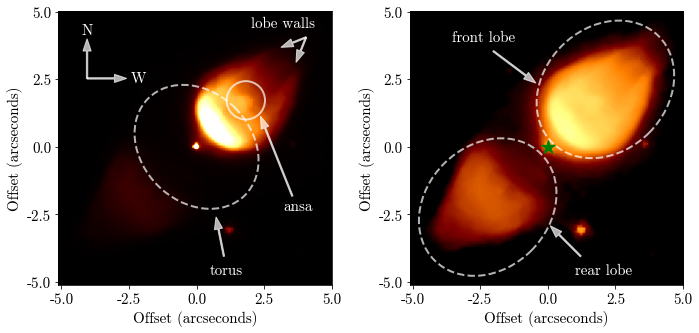

In [19]:
center_x = 686
center_y = 1027

hdul = fits.open("cleaned_image.fits")
data = hdul[0].data

star = data[center_x][center_y]

fig, axes = plt.subplots(1, 2, figsize = (10, 5))

angular_size = 6
angle_degrees = 43

text_size = 15

start_x = 50 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 50 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 50 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 50 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013

axes[0].imshow(data[center_x - 50 : center_x + 50, center_y - 50 : center_y + 50], vmin = 0, vmax = 15, cmap = 'afmhot', origin = 'lower')
# axes[0].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'green', linewidth = 3)
# axes[0].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'green', linewidth = 3)
axes[0].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2), fontsize = text_size)
axes[0].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2), fontsize = text_size)
axes[0].set_xlabel("Offset (arcseconds)", fontsize = text_size)
axes[0].set_ylabel("Offset (arcseconds)", fontsize = text_size)

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center', fontsize = text_size)

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'W', color = 'white', va = 'center', fontsize = text_size)

pre_log_data = data

min_val = 0.1
max_val = 100

pre_log_data[pre_log_data < min_val] = min_val
pre_log_data[pre_log_data > max_val] = max_val

log_data = np.log(pre_log_data)

axes[1].imshow(log_data[center_x - 50 : center_x + 50, center_y - 50 : center_y + 50], cmap = 'afmhot', origin = 'lower')
# axes[1].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
# axes[1].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'green', linewidth = 3)
# axes[1].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'green', linewidth = 3)
axes[1].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2), fontsize = text_size)
axes[1].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2), fontsize = text_size)
axes[1].set_xlabel("Offset (arcseconds)", fontsize = text_size)
axes[1].set_ylabel("Offset (arcseconds)", fontsize = text_size)

axes[1].arrow(10, 75, 0, arrow_length, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(10, 80 + arrow_length + 1, 'N', color = 'black', ha = 'center', fontsize = text_size)

axes[1].arrow(10, 75, arrow_length, 0, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15 + arrow_length + 1, 75, 'W', color = 'black', va = 'center', fontsize = text_size)

axes[1].scatter(50, 50, marker = '*', color = 'green', s = 200)

axes[0].arrow(85, 32, -10, 25, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)

import matplotlib.patches as patches

circle = patches.Circle((68, 67), radius = 7, fill = False, edgecolor = 'white', linewidth = 2, alpha = 0.7)
axes[0].add_patch(circle)

axes[0].text(87, 27, 'ansa', color = 'white', ha = 'center', fontsize = text_size)

# Arrow for east (right)
axes[1].arrow(62, 10, -8, 8, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(60, 5, 'rear lobe', color = 'white', va = 'center', fontsize = text_size)

axes[1].arrow(30, 85, 12, -9, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15, 90, 'front lobe', color = 'white', va = 'center', fontsize = text_size)

ellipse_center = (71, 71)
width = 55
height = 45 
angle = 45  

ellipse = patches.Ellipse(ellipse_center, width, height, angle = angle, 
                          edgecolor = 'white', facecolor = 'none', linestyle = '--', linewidth = 2, alpha = 0.7)

axes[1].add_patch(ellipse)

ellipse_center = (28, 28)
width = 55
height = 45 
angle = 45  

ellipse = patches.Ellipse(ellipse_center, width, height, angle = angle, 
                          edgecolor = 'white', facecolor = 'none', linestyle = '--', linewidth = 2, alpha = 0.7)

axes[1].add_patch(ellipse)

axes[0].arrow(90, 90, -5, -2, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].arrow(90, 90, -2, -5, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)

axes[0].text(70, 95, 'lobe walls', color = 'white', va = 'center', fontsize = text_size)

ellipse_center = (50, 50)
width = 50
height = 40 
angle = 135  

ellipse = patches.Ellipse(ellipse_center, width, height, angle = angle, 
                          edgecolor = 'white', facecolor = 'none', linestyle = '--', linewidth = 2, alpha = 0.7)

axes[0].add_patch(ellipse)

axes[0].arrow(60, 10, -2, 10, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(55, 5, 'torus', color = 'white', va = 'center', fontsize = text_size)

plt.subplots_adjust(wspace = 0.3)

# Save the combined plot
plt.tight_layout()
plt.savefig('hst-minkowski.png', dpi = 1500)

plt.show()

In [12]:
hdul = fits.open("hst_06761_02_wfpc2_f547m_wf_drz.fits")
data = hdul[1].data

115


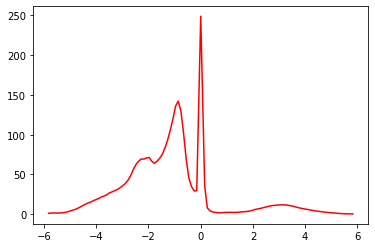

In [13]:
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [18, 20], [100, 100], linewidth = 3)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
y_array = np.delete(y_array, 57)
y_array = np.delete(y_array, 57)
x_array = np.delete(x_array, 57)
x_array = np.delete(x_array, 57)
y_array = np.insert(y_array, 57, data[980, 1459])
x_array = np.insert(x_array, 57, 0)
plt.plot(x_array, y_array, color = 'red')
print(len(y_array))

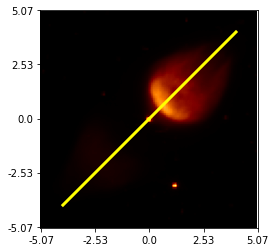

In [14]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
plt.plot([10, 90], [10, 90], color = 'yellow', linewidth = 3)
plt.xticks(ticks = np.linspace(0, 100, 5), labels = np.around(np.linspace(-50 * 0.1013, 50 * 0.1013, 5), 2))
plt.yticks(ticks = np.linspace(0, 100, 5), labels = np.around(np.linspace(-50 * 0.1013, 50 * 0.1013, 5), 2))
plt.savefig('HST M1-92.png', dpi = 100)

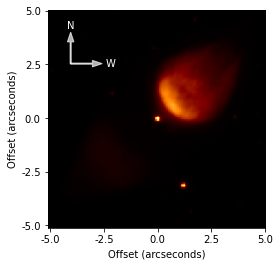

In [15]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
# plt.plot([8, 90], [9, 89], color = 'yellow', linewidth = 3)
plt.xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.xlabel("Offset (arcseconds)")
plt.ylabel("Offset (arcseconds)")

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
plt.arrow(10, 75, 0, arrow_length, color='white', width=0.5, head_width=3, alpha=0.7)
plt.text(10, 80 + arrow_length + 1, 'N', color='white', ha='center')

# Arrow for east (right)
plt.arrow(10, 75, arrow_length, 0, color='white', width=0.5, head_width=3, alpha=0.7)
plt.text(15 + arrow_length + 1, 75, 'W', color='white', va='center')


plt.savefig('HST M1-92.png', dpi = 100)

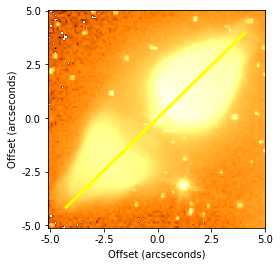

In [16]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], norm = c.LogNorm(), cmap = 'afmhot', origin = 'lower')
plt.plot([8, 90], [9, 89], color = 'yellow', linewidth = 3)
plt.xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.xlabel("Offset (arcseconds)")
plt.ylabel("Offset (arcseconds)")
plt.savefig('HST M1-92-log.png', dpi = 100)

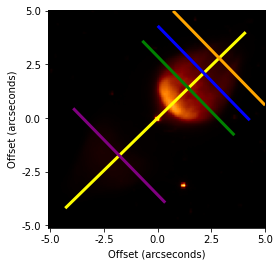

In [17]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
plt.plot([8, 90], [9, 89], color = 'yellow', linewidth = 3)
offset = 4
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'orange', linewidth = 3)
offset = 3
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'blue', linewidth = 3)
offset = 2
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'green', linewidth = 3)
offset = -2.5
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'purple', linewidth = 3)
plt.xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.xlabel("Offset (arcseconds)")
plt.ylabel("Offset (arcseconds)")
plt.savefig('HST M1-92-with-profiles.png', dpi = 100)

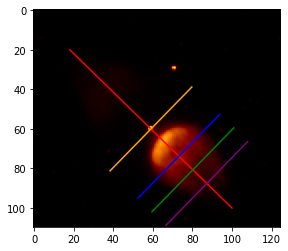

In [18]:
plt.imshow(data[920 : 1030, 1400 : 1525], cmap = 'afmhot')
plt.plot([18, 100], [20, 100], color = 'red')
offset = 0
plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'orange')
# plt.plot([100, 20], [18, 100], color = 'orange')
# plt.plot([100, 60], [48, 89], color = 'blue')
# plt.plot([100, 60], [68, 109], color = 'green')
# plt.plot([59, 59], [60, 61], color = 'green')
offset = 2
# plt.plot([59, 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60, 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'green')
# plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'blue')
plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'blue')
offset = 3
plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'green')
offset = 4
plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'purple')
plt.show()

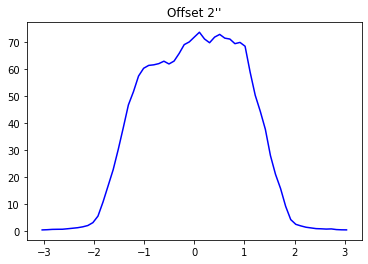

In [19]:
offset = 2
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'blue')
plt.title("Offset 2\'\'")
plt.show()

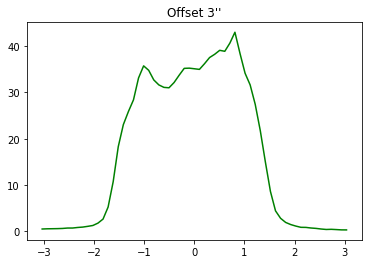

In [20]:
offset = 3
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'green')
plt.title("Offset 3\'\'")
plt.show()

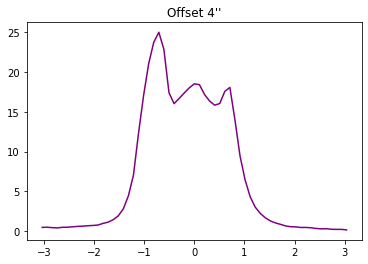

In [21]:
offset = 4
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'purple')
plt.title("Offset 4\'\'")
plt.show()

plt.imshow(data[978 : 982, 1457 : 1462], cmap = 'afmhot')
plt.plot([3 - 1, 5], [3 - 1, 5], color = 'red')

data[978 : 982, 1457 : 1462]

data[980, 1459]

x_array = np.linspace(-100 *  0.1013 * np.sqrt(2), 100 *  0.1013 * np.sqrt(2), 201)
y_array = [data[980, 1459]]
for i in range(1, 101):
    y_array.append(data[980 - i, 1459 - i])
    y_array.insert(0, data[980 + i, 1459 + i])

plt.plot(x_array, y_array, color = 'red')

data[920 + 75, 1400 + 75]

115


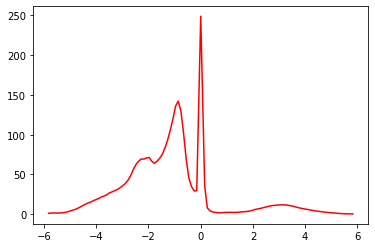

In [22]:
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [18, 20], [100, 100], linewidth = 3)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
y_array = np.delete(y_array, 57)
y_array = np.delete(y_array, 57)
x_array = np.delete(x_array, 57)
x_array = np.delete(x_array, 57)
y_array = np.insert(y_array, 57, data[980, 1459])
x_array = np.insert(x_array, 57, 0)
plt.plot(x_array, y_array, color = 'red')
print(len(y_array))

In [23]:
max_y = np.amax(y_array)

In [24]:
x_array_2 = np.linspace(-100 *  0.1013 * np.sqrt(2) * np.cos(3 * np.pi / 180), 100 *  0.1013 * np.sqrt(2) * np.cos(3 * np.pi / 180), 201)
y_array_2 = [data[980, 1459]]
for i in range(1, 101):
    y_array_2.append(data[980 - i, 1459 - i])
    y_array_2.insert(0, data[980 + i, 1459 + i])

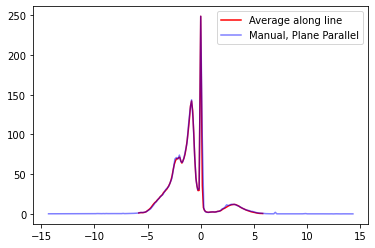

In [25]:
plt.plot(x_array, y_array, color = 'red', label = 'Average along line')
plt.plot(x_array_2, y_array_2, color = 'blue', alpha = 0.5, label = 'Manual, Plane Parallel')
plt.legend()

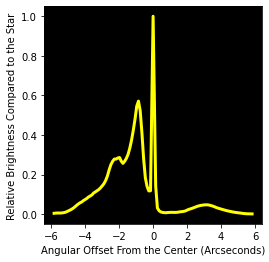

In [26]:
plt.plot(x_array, y_array / np.amax(y_array), color='yellow', linewidth = 3)
plt.gca().set_aspect(np.amax(x_array) * 2)
plt.xlabel('Angular Offset From the Center (Arcseconds)')
plt.ylabel('Relative Brightness Compared to the Star')
plt.xticks()
plt.yticks()

# Change background color to black
plt.gca().set_facecolor('black')

plt.savefig('HST M1-92-profile.png', dpi = 100)

y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [100, 48], [60, 89], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'blue')

y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [100, 48], [60 - 440 / 39, 100], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'blue')

y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [100, 68], [60, 109], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'green')

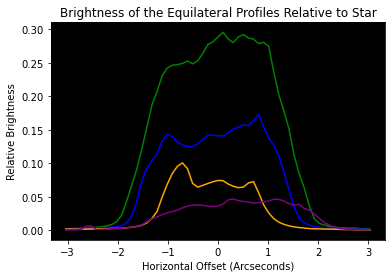

In [27]:
offset = 2
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array / max_y, color = 'green')
offset = 3
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array / max_y, color = 'blue')
offset = 4
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array / max_y, color = 'orange')
offset = -2.5
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array / max_y, color = 'purple')
plt.title("Brightness of the Equilateral Profiles Relative to Star")
plt.ylabel("Relative Brightness")
plt.xlabel("Horizontal Offset (Arcseconds)")
plt.gca().set_facecolor('black')
plt.savefig('HST M1-92-horizontal-profiles.png', dpi = 100)

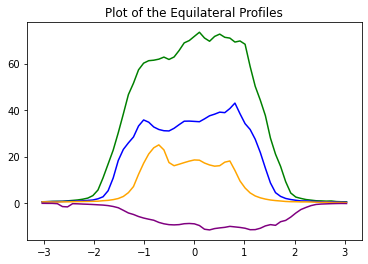

In [28]:
offset = 2
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'green')
offset = 3
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'blue')
offset = 4
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'orange')
offset = -2.5
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = -skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'purple')
plt.title("Plot of the Equilateral Profiles")
plt.show()

In [29]:
from scipy.ndimage import convolve

In [30]:
hdul = fits.open("hst_06761_02_wfpc2_f547m_wf_drz.fits")
data = hdul[1].data
def smooth_out_anomalies_no_conv(data, threshold_factor):
    # The 2D array that will store the smoothed data
    smoothed_data = data.copy()

    # Calculate the dimensions of the data
    nrows, ncols = data.shape

    # Loop over each pixel in the image
    for i in range(1, nrows - 1):
        for j in range(1, ncols - 1):

            # Extract the 3x3 neighborhood around the pixel
            neighborhood = data[i - 1 : i + 2, j - 1 : j + 2]

            # Compute the sum of the neighborhood
            sum_neighborhood = np.sum(neighborhood)

            # Subtract the center pixel's value
            sum_neighborhood -= data[i, j]

            # Compute the average of the neighborhood excluding the center pixel
            avg_neighborhood = sum_neighborhood / 8

            # Compute the difference between the pixel and the average of its neighborhood
            diff = np.abs(data[i, j] - avg_neighborhood)

            if i == 50 and j == 50:
                diff = 0

            # If the difference is greater than a given threshold, replace the pixel
            # value with the average of the neighborhood
            if diff > threshold_factor * np.std(neighborhood):
                smoothed_data[i, j] = avg_neighborhood

    return smoothed_data

In [31]:
star = data[980, 1459]

In [32]:
data[data < 0] = 0

In [33]:
data = smooth_out_anomalies_no_conv(data, threshold_factor = 2)

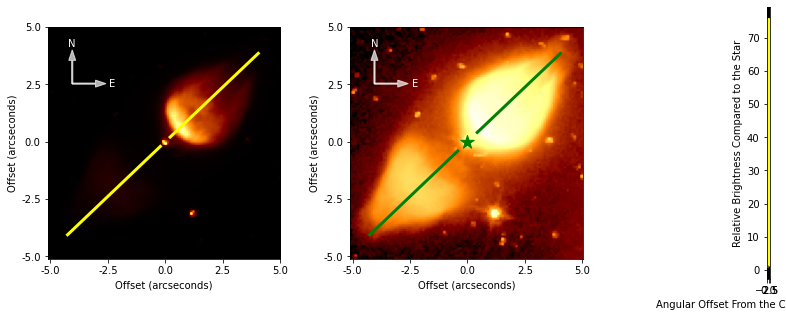

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
axes[0].plot([8, 50 - 2 * (50 - 8) / (50 - 10)], [10, 50 - 2], color = 'yellow', linewidth = 3)
axes[0].plot([50 + 2 * (50 - 8) / (50 - 10), 90], [50 + 2, 88], color = 'yellow', linewidth = 3)
axes[0].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_xlabel("Offset (arcseconds)")
axes[0].set_ylabel("Offset (arcseconds)")

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center')

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'E', color = 'white', va = 'center')

axes[1].imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], norm = c.LogNorm(vmin = data.max() / 10000), cmap = 'afmhot', origin = 'lower')
axes[1].plot([8, 50 - 4 * (50 - 8) / (50 - 10)], [10, 50 - 4], color = 'green', linewidth = 3)
axes[1].plot([50 + 4 * (50 - 8) / (50 - 10), 90], [50 + 4, 88], color = 'green', linewidth = 3)
axes[1].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_xlabel("Offset (arcseconds)")
axes[1].set_ylabel("Offset (arcseconds)")

axes[1].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center')

# Arrow for east (right)
axes[1].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15 + arrow_length + 1, 75, 'E', color = 'white', va = 'center')

axes[1].scatter(50, 50, marker = '*', color = 'green', s = 200)

axes[2].plot(x_array, y_array / np.amax(y_array), color = 'yellow', linewidth = 3)
axes[2].set_aspect(np.amax(x_array) * 2)
axes[2].set_xlabel('Angular Offset From the Center (Arcseconds)')
axes[2].set_ylabel('Relative Brightness Compared to the Star')

# Change background color to black
axes[2].set_facecolor('black')

plt.subplots_adjust(wspace = 0.3)

# Save the combined plot
plt.savefig('HST M1-92-combined', dpi = 100)

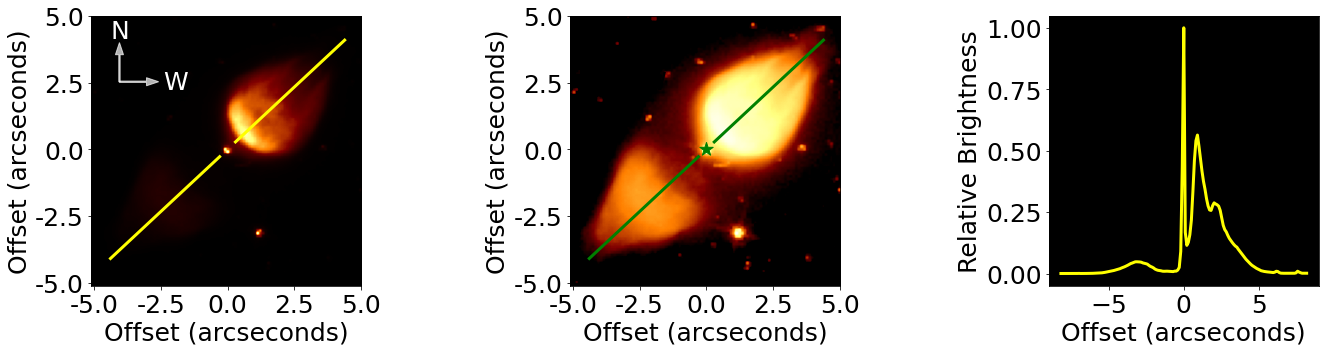

In [35]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))

angular_size = 6
angle_degrees = 43

# Make the bottom right 25x25 zero
# information[:25, -25:] = np.amax(information) / 1000

start_x = 50 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 50 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 50 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 50 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013

axes[0].imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
# axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[0].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'yellow', linewidth = 3)
axes[0].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'yellow', linewidth = 3)
axes[0].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2), fontsize = 25)
axes[0].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2), fontsize = 25)
axes[0].set_xlabel("Offset (arcseconds)", fontsize = 25)
axes[0].set_ylabel("Offset (arcseconds)", fontsize = 25)

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center', fontsize = 25)

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'W', color = 'white', va = 'center', fontsize = 25)

axes[1].imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], norm = c.LogNorm(vmin = data.max() / 1000), cmap = 'afmhot', origin = 'lower')
# axes[1].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[1].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'green', linewidth = 3)
axes[1].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'green', linewidth = 3)
axes[1].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2), fontsize = 25)
axes[1].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2), fontsize = 25)
axes[1].set_xlabel("Offset (arcseconds)", fontsize = 25)
axes[1].set_ylabel("Offset (arcseconds)", fontsize = 25)

axes[1].arrow(10, 75, 0, arrow_length, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(10, 80 + arrow_length + 1, 'N', color = 'black', ha = 'center', fontsize = 25)

# Arrow for east (right)
axes[1].arrow(10, 75, arrow_length, 0, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15 + arrow_length + 1, 75, 'W', color = 'black', va = 'center', fontsize = 25)

axes[1].scatter(50, 50, marker = '*', color = 'green', s = 200)

angular_size = 8.175

start_x = 100 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 100 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 100 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 100 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013

y_hst = skimage.measure.profile_line(data[980 - 100 : 980 + 100, 1459 - 100 : 1459 + 100], [start_x, start_y], [end_x, end_y], linewidth = 3)
x_hst = np.linspace(-(len(y_hst) - 1) / 2 *  0.1013, (len(y_hst) - 1) / 2 *  0.1013, len(y_hst))
y_hst = np.delete(y_hst, int(len(y_hst) / 2))
y_hst = np.insert(y_hst, int(len(y_hst) / 2), star)
x_hst = np.delete(x_hst, int(len(y_hst) / 2))
x_hst = np.insert(x_hst, int(len(y_hst) / 2), 0)

normalizedYHST = y_hst / np.max(np.nan_to_num(np.array(y_hst, dtype = float)))
axes[2].plot(x_hst, normalizedYHST[::-1], color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[2].set_aspect(np.amax(x_hst) * 2)
axes[2].set_xlabel('Offset (arcseconds)', fontsize = 25)
axes[2].set_ylabel('Relative Brightness', fontsize = 25)
axes[2].set_facecolor('black')

axes[2].tick_params(axis = 'x', labelsize = 25)  # For x-axis tick labels
axes[2].tick_params(axis = 'y', labelsize = 25)  # For y-axis tick labels

plt.subplots_adjust(wspace = 0.3)

# Save the combined plot
plt.tight_layout()
plt.savefig('hst-minkowski.png', dpi = 100)

plt.show()

In [36]:
hdul = fits.open("u39z010nt_drz.fits")
data = hdul[1].data

In [37]:
for i in range(len(data)):
    for j in range(len(data[0])):
        if np.abs(data[i][j] - 79) <= 1:
            print(i)
            print(j)

954
968


In [38]:
star = 78

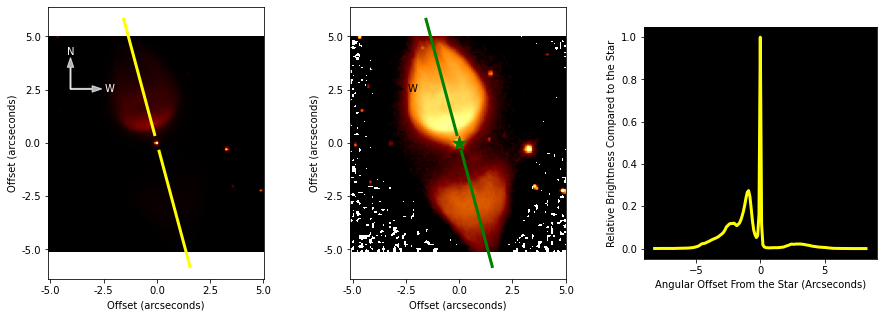

In [39]:
hdul = fits.open("u39z010nt_drz.fits")
data = hdul[1].data

ig, axes = plt.subplots(1, 3, figsize=(15, 5))

angular_size = 6
angle_degrees = 105

# Make the bottom right 25x25 zero
# information[:25, -25:] = np.amax(information) / 1000

start_x = 50 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 50 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 50 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 50 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013

axes[0].imshow(data[954 - 50 : 954 + 50, 968 - 50 : 968 + 50], cmap = 'afmhot', origin = 'lower')
# axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[0].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'yellow', linewidth = 3)
axes[0].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'yellow', linewidth = 3)
axes[0].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_xlabel("Offset (arcseconds)")
axes[0].set_ylabel("Offset (arcseconds)")

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center')

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'W', color = 'white', va = 'center')

axes[1].imshow(data[954 - 50 : 954 + 50, 968 - 50 : 968 + 50], norm = c.LogNorm(vmin = data.max() / 1000), cmap = 'afmhot', origin = 'lower')
# axes[1].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[1].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'green', linewidth = 3)
axes[1].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'green', linewidth = 3)
axes[1].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_xlabel("Offset (arcseconds)")
axes[1].set_ylabel("Offset (arcseconds)")

axes[1].arrow(10, 75, 0, arrow_length, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(10, 80 + arrow_length + 1, 'N', color = 'black', ha = 'center')

# Arrow for east (right)
axes[1].arrow(10, 75, arrow_length, 0, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15 + arrow_length + 1, 75, 'W', color = 'black', va = 'center')

axes[1].scatter(50, 50, marker = '*', color = 'green', s = 200)

angular_size = 8.175

start_x = 100 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 100 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 100 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 100 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013

y_hst = skimage.measure.profile_line(data[954 - 100 : 954 + 100, 968 - 100 : 968 + 100], [start_x, start_y], [end_x, end_y], linewidth = 3)
x_hst = np.linspace(-(len(y_hst) - 1) / 2 *  0.1013, (len(y_hst) - 1) / 2 *  0.1013, len(y_hst))
y_hst = np.delete(y_hst, int(len(y_hst) / 2))
y_hst = np.insert(y_hst, int(len(y_hst) / 2), star)
x_hst = np.delete(x_hst, int(len(y_hst) / 2))
x_hst = np.insert(x_hst, int(len(y_hst) / 2), 0)

normalizedYHST = y_hst / np.max(np.nan_to_num(np.array(y_hst, dtype = float)))
axes[2].plot(x_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[2].set_aspect(np.amax(x_hst) * 2)
axes[2].set_xlabel('Angular Offset From the Star (Arcseconds)')
axes[2].set_ylabel('Relative Brightness Compared to the Star')
axes[2].set_facecolor('black')

plt.subplots_adjust(wspace = 0.3)

# Save the combined plot
# plt.savefig('HST M1-92-combined', dpi = 100)

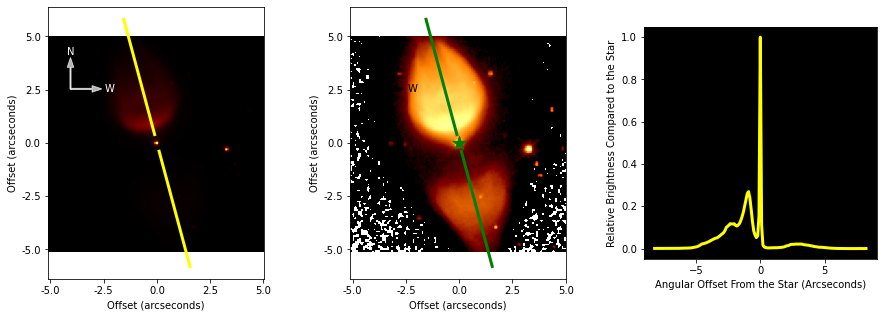

In [40]:
hdul = fits.open("u39z010ot_drz.fits")
data = hdul[1].data

ig, axes = plt.subplots(1, 3, figsize=(15, 5))

angular_size = 6
angle_degrees = 105

# Make the bottom right 25x25 zero
# information[:25, -25:] = np.amax(information) / 1000

start_x = 50 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 50 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 50 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 50 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013

axes[0].imshow(data[954 - 50 : 954 + 50, 968 - 50 : 968 + 50], cmap = 'afmhot', origin = 'lower')
# axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[0].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'yellow', linewidth = 3)
axes[0].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'yellow', linewidth = 3)
axes[0].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_xlabel("Offset (arcseconds)")
axes[0].set_ylabel("Offset (arcseconds)")

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center')

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'W', color = 'white', va = 'center')

axes[1].imshow(data[954 - 50 : 954 + 50, 968 - 50 : 968 + 50], norm = c.LogNorm(vmin = data.max() / 1000), cmap = 'afmhot', origin = 'lower')
# axes[1].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[1].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'green', linewidth = 3)
axes[1].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'green', linewidth = 3)
axes[1].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_xlabel("Offset (arcseconds)")
axes[1].set_ylabel("Offset (arcseconds)")

axes[1].arrow(10, 75, 0, arrow_length, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(10, 80 + arrow_length + 1, 'N', color = 'black', ha = 'center')

# Arrow for east (right)
axes[1].arrow(10, 75, arrow_length, 0, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15 + arrow_length + 1, 75, 'W', color = 'black', va = 'center')

axes[1].scatter(50, 50, marker = '*', color = 'green', s = 200)

angular_size = 8.175

start_x = 100 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 100 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 100 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 100 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013

y_hst = skimage.measure.profile_line(data[954 - 100 : 954 + 100, 968 - 100 : 968 + 100], [start_x, start_y], [end_x, end_y], linewidth = 3)
x_hst = np.linspace(-(len(y_hst) - 1) / 2 *  0.1013, (len(y_hst) - 1) / 2 *  0.1013, len(y_hst))
y_hst = np.delete(y_hst, int(len(y_hst) / 2))
y_hst = np.insert(y_hst, int(len(y_hst) / 2), data[954][968])
x_hst = np.delete(x_hst, int(len(y_hst) / 2))
x_hst = np.insert(x_hst, int(len(y_hst) / 2), 0)

normalizedYHST = y_hst / np.max(np.nan_to_num(np.array(y_hst, dtype = float)))
axes[2].plot(x_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[2].set_aspect(np.amax(x_hst) * 2)
axes[2].set_xlabel('Angular Offset From the Star (Arcseconds)')
axes[2].set_ylabel('Relative Brightness Compared to the Star')
axes[2].set_facecolor('black')

plt.subplots_adjust(wspace = 0.3)

# Save the combined plot
# plt.savefig('HST M1-92-combined', dpi = 100)

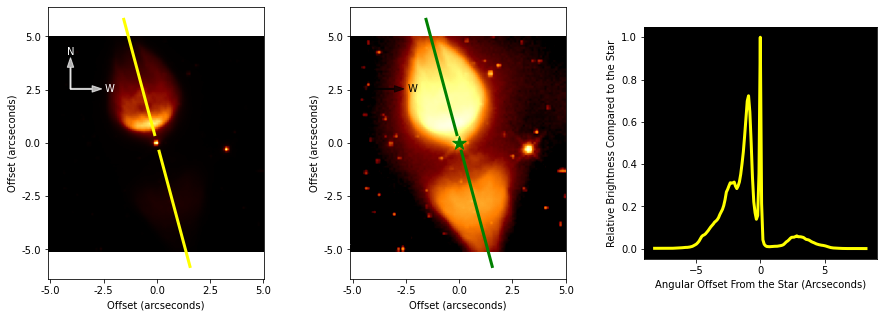

In [41]:
hdul = fits.open("u39z010pt_drz.fits")
data = hdul[1].data

ig, axes = plt.subplots(1, 3, figsize=(15, 5))

angular_size = 6
angle_degrees = 105

# Make the bottom right 25x25 zero
# information[:25, -25:] = np.amax(information) / 1000

start_x = 50 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 50 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 50 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 50 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013

axes[0].imshow(data[954 - 50 : 954 + 50, 968 - 50 : 968 + 50], cmap = 'afmhot', origin = 'lower')
# axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[0].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'yellow', linewidth = 3)
axes[0].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'yellow', linewidth = 3)
axes[0].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_xlabel("Offset (arcseconds)")
axes[0].set_ylabel("Offset (arcseconds)")

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center')

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'W', color = 'white', va = 'center')

axes[1].imshow(data[954 - 50 : 954 + 50, 968 - 50 : 968 + 50], norm = c.LogNorm(vmin = data.max() / 1000), cmap = 'afmhot', origin = 'lower')
# axes[1].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[1].plot([start_x, 50 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 50 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'green', linewidth = 3)
axes[1].plot([50 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [50 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'green', linewidth = 3)
axes[1].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_xlabel("Offset (arcseconds)")
axes[1].set_ylabel("Offset (arcseconds)")

axes[1].arrow(10, 75, 0, arrow_length, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(10, 80 + arrow_length + 1, 'N', color = 'black', ha = 'center')

# Arrow for east (right)
axes[1].arrow(10, 75, arrow_length, 0, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15 + arrow_length + 1, 75, 'W', color = 'black', va = 'center')

axes[1].scatter(50, 50, marker = '*', color = 'green', s = 200)

angular_size = 8.175

start_x = 100 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 100 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 100 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 100 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013

y_hst = skimage.measure.profile_line(data[954 - 100 : 954 + 100, 968 - 100 : 968 + 100], [start_x, start_y], [end_x, end_y], linewidth = 3)
x_hst = np.linspace(-(len(y_hst) - 1) / 2 *  0.1013, (len(y_hst) - 1) / 2 *  0.1013, len(y_hst))
y_hst = np.delete(y_hst, int(len(y_hst) / 2))
y_hst = np.insert(y_hst, int(len(y_hst) / 2), data[954][968])
x_hst = np.delete(x_hst, int(len(y_hst) / 2))
x_hst = np.insert(x_hst, int(len(y_hst) / 2), 0)

normalizedYHST = y_hst / np.max(np.nan_to_num(np.array(y_hst, dtype = float)))
axes[2].plot(x_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[2].set_aspect(np.amax(x_hst) * 2)
axes[2].set_xlabel('Angular Offset From the Star (Arcseconds)')
axes[2].set_ylabel('Relative Brightness Compared to the Star')
axes[2].set_facecolor('black')

plt.subplots_adjust(wspace = 0.3)

# Save the combined plot
# plt.savefig('HST M1-92-combined', dpi = 100)

In [42]:
for i in range(len(data)):
    for j in range(len(data[0])):
        if data[i][j] >= 23:
            print(i)
            print(j)

951
1000
954
968
997
869


In [43]:
psf = data[997 - 50 : 997 + 50, 869 - 50 : 869 + 50]

In [44]:
data1 = fits.open("f547m_300s.fits")[1].data
data2 = fits.open("f547m_400s_1.fits")[1].data
data3 = fits.open("f547m_400s_2.fits")[1].data
data4 = fits.open("f547m_80s_1.fits")[1].data
data5 = fits.open("f547m_80s_2.fits")[1].data

In [45]:
star_300 = data1[980][1459]
lobe_300 = 140.20372

In [46]:
star_400_1 = data2[954][968]
lobe_400_1 = 21.610838

In [47]:
star_400_2 = data3[954][968]
lobe_400_2 = 21.574484

In [48]:
star_80_1 = data4[954][968]
lobe_80_1 = 21.444357

In [49]:
star_80_2 = data5[954][968]
lobe_80_2 = 21.397123

In [50]:
star_normalized = np.array([star_300 / (lobe_300 / 300), star_400_1 / (lobe_400_1 / 400), star_400_2 / (lobe_400_2 / 400), star_80_1 / (lobe_80_1 / 80), star_80_2 / (lobe_80_2 / 80)])
exposure_time = np.array([300, 400, 400, 80, 80])

(0.0, 450.0)

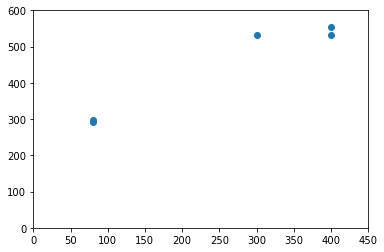

In [51]:
plt.scatter(exposure_time, star_normalized)
plt.ylim(0, 600)
plt.xlim(0, 450)

In [52]:
angle_degrees = 105
angular_size = 8.175

start_x = 100 + np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_x = 100 - np.sin(angle_degrees * np.pi / 180) * angular_size / 0.1013
start_y = 100 + np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013
end_y = 100 - np.cos(angle_degrees * np.pi / 180) * angular_size / 0.1013

y_hst = skimage.measure.profile_line(data5[954 - 100 : 954 + 100, 968 - 100 : 968 + 100], [start_x, start_y], [end_x, end_y], linewidth = 3)
y_max = np.partition(y_hst, -2)[-2]
print(y_max)

21.397123


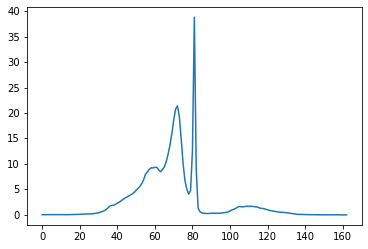

In [53]:
plt.plot(y_hst)

In [54]:
data = fits.open("f547m_80s_raw_1.fits")[0].data[0]

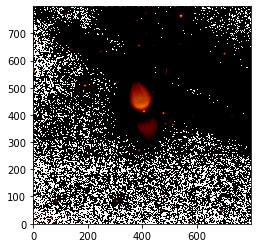

In [55]:
plt.imshow(data, norm = c.LogNorm(vmin = data.max() / 10000), cmap = 'afmhot', origin = 'lower')

In [56]:
for i in range(len(data)):
    for j in range(len(data[0])):
        if np.abs(data[i][j] - 2870) <= 3:
            print(i)
            print(j)

412
407


In [57]:
# find PSF 1
for i in range(len(data)):
    for j in range(len(data[0])):
        if np.abs(data[i][j] - 1862) <= 3:
            print(i)
            print(j)

508
190


In [58]:
# find PSF 2
for i in range(len(data)):
    for j in range(len(data[0])):
        if np.abs(data[i][j] - 1879) <= 3:
            print(i)
            print(j)

406
478


/tmp/ipykernel_2920846/38750351.py:16: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[0].imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], cmap = 'afmhot', origin = 'lower')
/tmp/ipykernel_2920846/38750351.py:35: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], norm = c.LogNorm(vmin = data.max() / 1000), cmap = 'afmhot', origin = 'lower')


IndexError: index 1027 is out of bounds for axis 0 with size 800

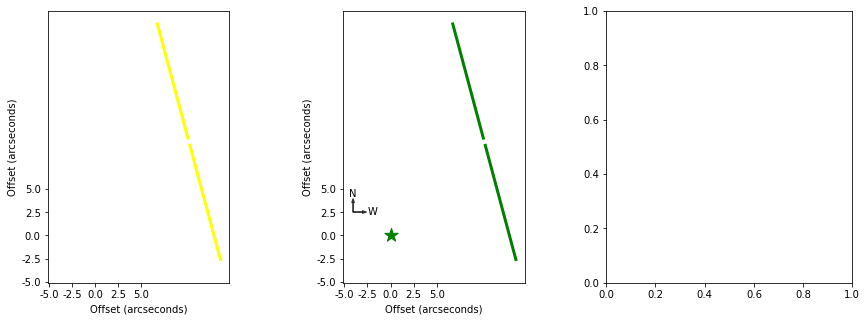

In [59]:
ig, axes = plt.subplots(1, 3, figsize=(15, 5))

c

angular_size = 6
angle_degrees = 105

# Make the bottom right 25x25 zero
# information[:25, -25:] = np.amax(information) / 1000

start_x = 150 - np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_x = 150 + np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
start_y = 150 - np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_y = 150 + np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)

axes[0].imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], cmap = 'afmhot', origin = 'lower')
# axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[0].plot([start_x, 150 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 150 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'yellow', linewidth = 3)
axes[0].plot([150 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [150 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'yellow', linewidth = 3)
axes[0].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_xlabel("Offset (arcseconds)")
axes[0].set_ylabel("Offset (arcseconds)")

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center')

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'W', color = 'white', va = 'center')

axes[1].imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], norm = c.LogNorm(vmin = data.max() / 1000), cmap = 'afmhot', origin = 'lower')
# axes[1].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)
axes[1].plot([start_x, 150 - 4 * np.cos(angle_degrees * np.pi / 180)], [start_y, 150 - 4 * np.sin(angle_degrees * np.pi / 180)], color = 'green', linewidth = 3)
axes[1].plot([150 + 4 * np.cos(angle_degrees * np.pi / 180), end_x], [150 + 4 * np.sin(angle_degrees * np.pi / 180), end_y], color = 'green', linewidth = 3)
axes[1].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_xlabel("Offset (arcseconds)")
axes[1].set_ylabel("Offset (arcseconds)")

axes[1].arrow(10, 75, 0, arrow_length, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(10, 80 + arrow_length + 1, 'N', color = 'black', ha = 'center')

# Arrow for east (right)
axes[1].arrow(10, 75, arrow_length, 0, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15 + arrow_length + 1, 75, 'W', color = 'black', va = 'center')

axes[1].scatter(50, 50, marker = '*', color = 'green', s = 200)

angular_size = 8.175

start_x = 200 + np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_x = 200 - np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
start_y = 200 + np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_y = 200 - np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)

y_hst = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 7)
x_hst = np.linspace(-(len(y_hst) - 1) / 2 *  (0.1013 / 2.196257815841434), (len(y_hst) - 1) / 2 *  (0.1013 / 2.196257815841434), len(y_hst))
y_hst = np.delete(y_hst, int(len(y_hst) / 2))
y_hst = np.insert(y_hst, int(len(y_hst) / 2), data[center_x][center_y])
x_hst = np.delete(x_hst, int(len(y_hst) / 2))
x_hst = np.insert(x_hst, int(len(y_hst) / 2), 0)

normalizedYHST = y_hst / np.max(np.nan_to_num(np.array(y_hst, dtype = float)))
axes[2].plot(x_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[2].set_aspect(np.amax(x_hst) * 2)
axes[2].set_xlabel('Angular Offset From the Star (Arcseconds)')
axes[2].set_ylabel('Relative Brightness Compared to the Star')
axes[2].set_facecolor('black')

plt.subplots_adjust(wspace = 0.3)

# Save the combined plot
# plt.savefig('HST M1-92-combined', dpi = 100)

ValueError: x and y must have same first dimension, but have shapes (356,) and (353,)

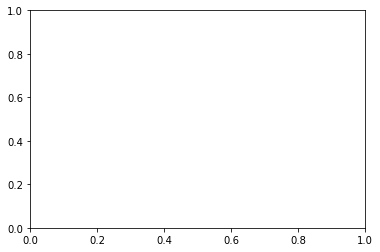

In [67]:
plt.plot(x_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

plt.annotate("goes to 1", 
                 xy=(2, 0.2), 
                 fontsize=12,
                 color='red')

# Draw the arrow separately using arrow
plt.arrow(1, 0.2, -0.5, 0, 
              head_width=0.02, 
              head_length=0.2, 
              fc='red', 
              ec='red')

plt.gca().set_aspect(np.amax(x_hst) * 2)
plt.xlabel('Angular Offset From the Star (Arcseconds)')
plt.ylabel('Relative Brightness Compared to the Star')
plt.gca().set_facecolor('black')

In [68]:
psf_data = fits.open("psf_f547m_pc1_400.fits")[0].data

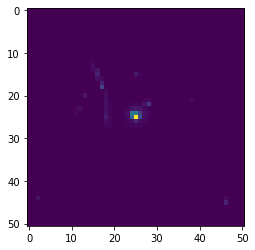

In [69]:
plt.imshow(psf_data)

In [70]:
data = psf_data

In [71]:
data = fits.open("80_raw_1.fits")[0].data[0]

for i in range(len(data)):
    for j in range(len(data[0])):
        if np.abs(data[i][j] - 1862) <= 1: 
            print(i)
            print(j)

508
190


In [72]:
data = fits.open("80_raw_1.fits")[0].data[0]

for i in range(len(data)):
    for j in range(len(data[0])):
        if np.abs(data[i][j] - 1879) <= 1: 
            print(i)
            print(j)

406
478


In [73]:
center_x = 412
center_y = 407

data = fits.open("f547m_80s_raw_1.fits")[0].data[0][center_x - 10 : center_x + 10, center_y - 10 : center_y + 10]

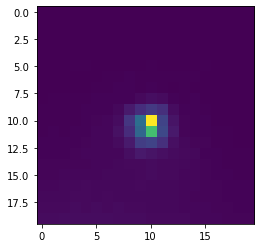

In [74]:
plt.imshow(data)

In [75]:
from scipy.optimize import curve_fit

In [76]:
def gaussian_2D(x_y, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = x_y
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()

In [77]:
x, y = np.meshgrid(np.linspace(0, data.shape[1]-1, data.shape[1]), np.linspace(0, data.shape[0]-1, data.shape[0]))

In [78]:
initial_guess = (data.max(), data.shape[1]/2, data.shape[0]/2, data.shape[1]/4, data.shape[0]/4, 0, data.min())
params, covar = curve_fit(gaussian_2D, (x, y), data.ravel(), p0=initial_guess)

In [79]:
initial_guess

(2870.8333, 10.0, 10.0, 5.0, 5.0, 0, 2.964642)

In [80]:
params[0]

2886.2406299127606

In [81]:
params[1]

9.885152454146345

In [82]:
params[2]

10.38408962098819

In [83]:
center_x = 406
center_y = 478

data = fits.open("f547m_80s_raw_1.fits")[0].data[0][center_x - 10 : center_x + 10, center_y - 10 : center_y + 10]

from scipy.optimize import curve_fit

def gaussian_2D(x_y, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = x_y
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()

x, y = np.meshgrid(np.linspace(0, data.shape[1]-1, data.shape[1]), np.linspace(0, data.shape[0]-1, data.shape[0]))

initial_guess = (data.max(), data.shape[1]/2, data.shape[0]/2, data.shape[1]/4, data.shape[0]/4, 0, data.min())
params, covar = curve_fit(gaussian_2D, (x, y), data.ravel(), p0=initial_guess)

print(params[1])
print(params[2])

10.442741433645564
10.239901593686351


In [84]:
center_x = 412
center_y = 407

In [85]:
data_1 = np.sqrt(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150])

In [86]:
data = fits.open("f547m_80s_raw_1.fits")[0].data[0]

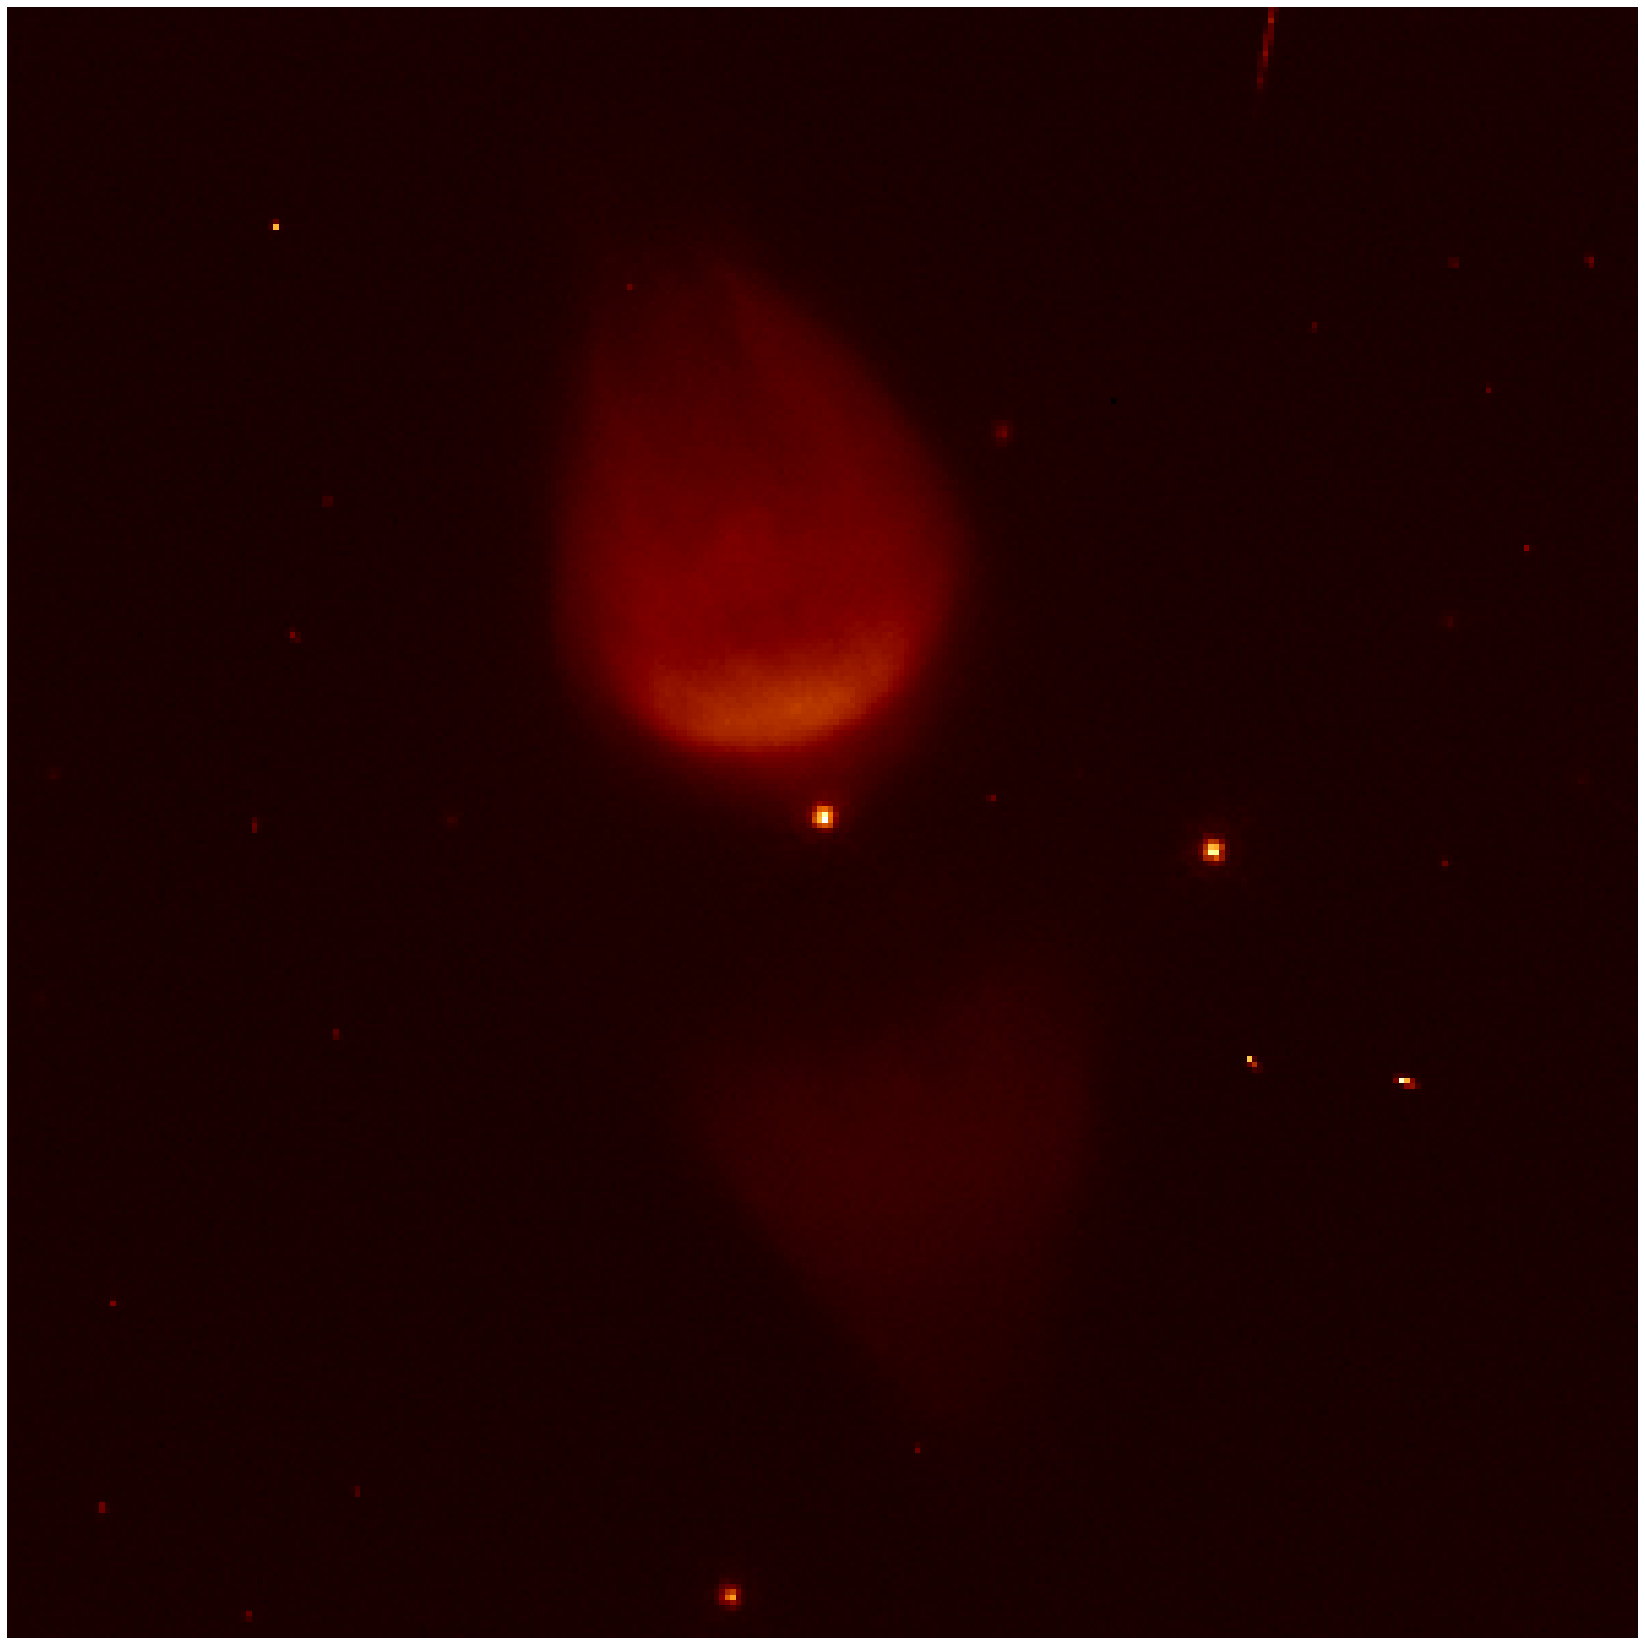

In [87]:
fig, ax = plt.subplots(figsize = (30, 30))
ax.set_aspect('equal')

from matplotlib.colors import PowerNorm

# plt.imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], vmin = 0, vmax = 3500, cmap = 'afmhot', origin = 'lower')
plt.imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], norm = PowerNorm(0.5), cmap = 'afmhot', origin = 'lower')

plt.axis('off')
plt.show()

In [88]:
from math import sqrt, sin, cos, acos, atan, tanh
pi = 3.14159265358979323846
pixel_size = (0.1013 / 2.196257815841434)

In [ ]:
angular_size = 3

In [ ]:
angle_degrees = 105

offset = -2

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
plt.plot(x_array, y_array / 1897.2821350097656, color = 'green')

offset = -3

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
plt.plot(x_array, y_array / 1897.2821350097656, color = 'blue')

offset = -4

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
plt.plot(x_array, y_array / 1897.2821350097656, color = 'orange')

offset = 2.5

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
plt.plot(x_array, y_array / 1897.2821350097656, color = 'purple')
plt.title("Brightness of the Equilateral Profiles Relative to Star")
plt.ylabel("Relative Brightness")
plt.xlabel("Horizontal Offset (Arcseconds)")
plt.gca().set_facecolor('black')
plt.savefig('HST M1-92-horizontal-profiles.png', dpi = 100)

In [60]:

angular_size = 8.175

start_x = 200 + np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_x = 200 - np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
start_y = 200 + np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_y = 200 - np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)



y_hst = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 3)
x_hst = np.linspace(-(len(y_hst) - 1) / 2 *  (0.1013 / 2.196257815841434), (len(y_hst) - 1) / 2 *  (0.1013 / 2.196257815841434), len(y_hst))
y_hst = np.delete(y_hst, int(len(y_hst) / 2))
y_hst = np.insert(y_hst, int(len(y_hst) / 2), data[center_x][center_y])
x_hst = np.delete(x_hst, int(len(y_hst) / 2))
x_hst = np.insert(x_hst, int(len(y_hst) / 2), 0)

normalizedYHST = y_hst / np.max(np.nan_to_num(np.array(y_hst, dtype = float)))

IndexError: index 1027 is out of bounds for axis 0 with size 800

In [61]:
hst_image = fits.open("80_raw_2.fits")[0].data[0]
real_half_resolution = 176

x_array = np.linspace(-real_half_resolution * 0.04612391098591937, real_half_resolution * 0.04612391098591937, real_half_resolution * 2 + 1)

center_x = 412
center_y = 407

start_x = 150 + np.sin(105 * np.pi / 180) * 8.175 / 0.04612391098591937
end_x = 150 - np.sin(105 * np.pi / 180) * 8.175 / 0.04612391098591937
start_y = 150 + np.cos(105 * np.pi / 180) * 8.175 / 0.04612391098591937
end_y = 150 - np.cos(105 * np.pi / 180) * 8.175 / 0.04612391098591937

y_hst = skimage.measure.profile_line(hst_image[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], [start_x, start_y], [end_x, end_y], linewidth = 3)
x_hst = np.linspace(-(len(y_hst) - 1) / 2 *  0.04612391098591937, (len(y_hst) - 1) / 2 *  0.04612391098591937, len(y_hst))
y_hst = np.delete(y_hst, int(len(y_hst) / 2))
y_hst = np.insert(y_hst, int(len(y_hst) / 2), hst_image[center_x, center_y])
x_hst = np.delete(x_hst, int(len(y_hst) / 2))
x_hst = np.insert(x_hst, int(len(y_hst) / 2), 0)

y_hst_scaled = np.interp(x_array, x_hst, y_hst)[::-1]

x_array_hst = x_array
normalizedYHST = y_hst_scaled / np.max(np.nan_to_num(np.array(y_hst_scaled, dtype = float)))

In [62]:
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import PowerNorm

# Adjusted function to lighten a color
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by mixing it with white.

    Parameters:
    - color: The color to lighten. Can be a named color, a hex color, or an RGB tuple.
    - amount: The amount to lighten the color. 0 means no change, 1 means fully lightened to white.
    
    Returns:
    - The lightened color as an RGB tuple.
    """
    # Convert the named color to an RGB tuple
    rgb = np.array(mcolors.to_rgb(color))
    # Calculate the lightened color by adding the white color proportionally
    lightened_rgb = rgb + (np.array([1, 1, 1]) - rgb) * amount
    
    # Ensure the RGB values are within the valid range [0, 1]
    lightened_rgb = np.clip(lightened_rgb, 0, 1)
    
    return tuple(lightened_rgb)

# Example usage to lighten the color red
light_red = lighten_color('red', amount=0.5)  # Lighten by 50%
light_green = lighten_color('green', amount=0.5)  # Lighten by 50%
light_blue = lighten_color('blue', amount=0.5)  # Lighten by 50%
light_purple = lighten_color('purple', amount=0.5)  # Lighten by 50%
light_orange = lighten_color('orange', amount=0.5)  # Lighten by 50%

Text(0, 0.5, 'Relative Brightness Compared to the Star')

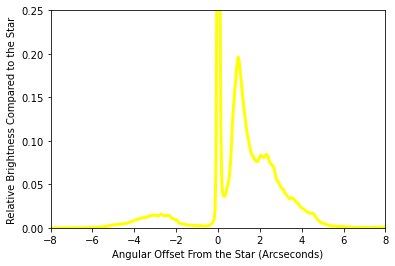

In [63]:
plt.plot(x_array_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

plt.xlim(-8, 8)
plt.ylim([0, 0.25])

# plt.annotate("$\mathbf{central\ star}$\n$\mathbf{goes\ to\ 1}$", 
                 # xy = (0.5, 0.14), 
                 # fontsize = 12,
                 # color = 'white')

# Draw the arrow separately using arrow
# plt.arrow(3, 0.165, -1.5, 0.025, 
              # head_width = 0.01, 
              # head_length = 0.25, 
              # fc = 'white', 
              # ec = 'white')

plt.xlabel('Angular Offset From the Star (Arcseconds)')
plt.ylabel('Relative Brightness Compared to the Star')

# plt.set_aspect(np.max(x_hst) * 2 / 0.2, 'box')

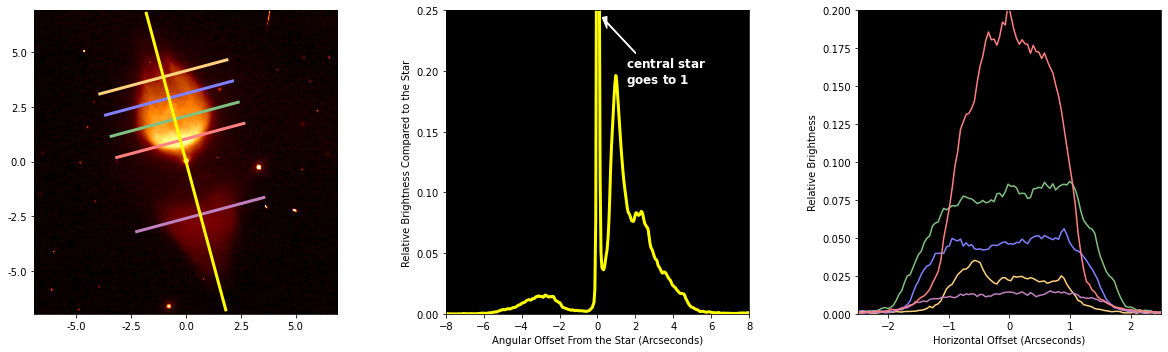

In [64]:
fig, axes = plt.subplots(1, 3, figsize = (17, 5))

plt.rcParams.update({'font.size': 10})

angular_size = 3

axes[0].imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], norm = PowerNorm(0.5, vmin = 0, vmax = 500), cmap = 'afmhot', origin = 'lower')

offset = -2

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_green, linewidth = 3)

offset = -3

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_blue, linewidth = 3)

offset = -4

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_orange, linewidth = 3)

offset = -1

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_red, linewidth = 3)

offset = 2.5

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_purple, linewidth = 3)

angular_size = 7

start_y = 150 + np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_y = 150 - np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
start_x = 150 + np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_x = 150 - np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)

axes[0].set_aspect('equal', 'box')

# axes[0].axis('off')

axes[0].set_xticks(ticks = np.linspace(150 - 5 / (0.1013 / 2.196257815841434), 150 + 5 / (0.1013 / 2.196257815841434), 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(150 - 5 / (0.1013 / 2.196257815841434), 150 + 5 / (0.1013 / 2.196257815841434), 5), labels = np.around(np.linspace(-5, 5, 5), 2))

axes[1].plot(x_array_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[1].set_xlim(-8, 8)
axes[1].set_ylim(0, 0.25)

axes[1].annotate("$\mathbf{central\ star}$\n$\mathbf{goes\ to\ 1}$", 
                 xy = (1.5, 0.19), 
                 fontsize = 12,
                 color = 'white')

# Draw the arrow separately using arrow
axes[1].arrow(2, 0.215, -1.5, 0.025, 
              head_width = 0.01, 
              head_length = 0.25, 
              fc = 'white', 
              ec = 'white')

axes[1].set_xlabel('Angular Offset From the Star (Arcseconds)')
axes[1].set_ylabel('Relative Brightness Compared to the Star')

# axes[1].set_aspect(np.max(x_hst) * 2 / 0.2, 'box')
axes[1].set_facecolor('black')

axes[1].set_aspect(64, adjustable = 'box')

angular_size = 3

offset = -2

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_green)

offset = -3

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_blue)

offset = -4

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_orange)

offset = 2.5

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_purple)

offset = -1

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_red)

# axes[2].set_title("Brightness of the Equilateral Profiles Relative to Star")
axes[2].set_ylabel("Relative Brightness")
axes[2].set_xlabel("Horizontal Offset (Arcseconds)")
axes[2].set_xlim(-2.5, 2.5)
axes[2].set_ylim(0, 0.2)
axes[2].set_facecolor('black')

axes[2].set_aspect(25, adjustable='box')

fig.tight_layout()

fig.savefig('HST M1-92-profiles-display.png', dpi = 100)

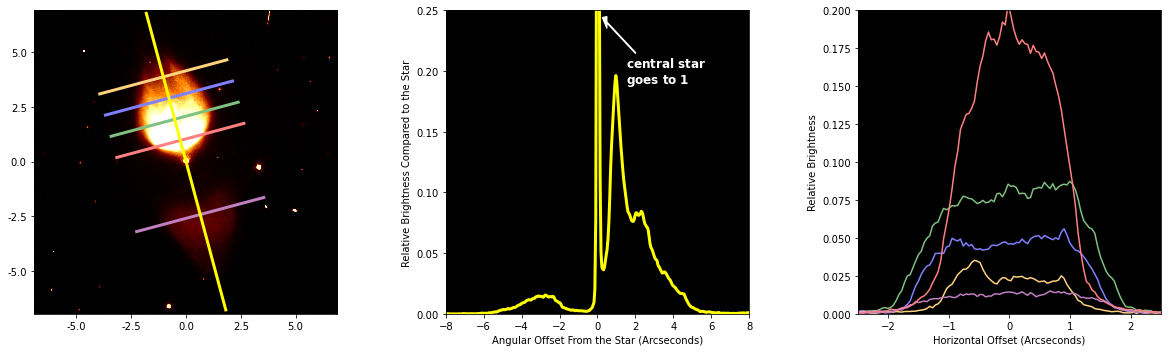

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

angular_size = 3

axes[0].imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], vmin = 0, vmax = 150, cmap = 'afmhot', origin = 'lower')

offset = -2

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_green, linewidth = 3)

offset = -3

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_blue, linewidth = 3)

offset = -4

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_orange, linewidth = 3)

offset = -1

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_red, linewidth = 3)

offset = 2.5

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = light_purple, linewidth = 3)

angular_size = 7

start_y = 150 + np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_y = 150 - np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
start_x = 150 + np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_x = 150 - np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)

axes[0].set_aspect('equal', 'box')

# axes[0].axis('off')

axes[0].set_xticks(ticks = np.linspace(150 - 5 / (0.1013 / 2.196257815841434), 150 + 5 / (0.1013 / 2.196257815841434), 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(150 - 5 / (0.1013 / 2.196257815841434), 150 + 5 / (0.1013 / 2.196257815841434), 5), labels = np.around(np.linspace(-5, 5, 5), 2))

axes[1].plot(x_array_hst, normalizedYHST, color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[1].set_xlim(-8, 8)
axes[1].set_ylim(0, 0.25)

axes[1].annotate("$\mathbf{central\ star}$\n$\mathbf{goes\ to\ 1}$", 
                 xy = (1.5, 0.19), 
                 fontsize = 12,
                 color = 'white')

# Draw the arrow separately using arrow
axes[1].arrow(2, 0.215, -1.5, 0.025, 
              head_width = 0.01, 
              head_length = 0.25, 
              fc = 'white', 
              ec = 'white')

axes[1].set_xlabel('Angular Offset From the Star (Arcseconds)')
axes[1].set_ylabel('Relative Brightness Compared to the Star')

# axes[1].set_aspect(np.max(x_hst) * 2 / 0.2, 'box')
axes[1].set_facecolor('black')

axes[1].set_aspect(64, adjustable = 'box')

angular_size = 3

offset = -2

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_green)

offset = -3

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_blue)

offset = -4

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_orange)

offset = 2.5

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_purple)

offset = -1

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = light_red)

# axes[2].set_title("Brightness of the Equilateral Profiles Relative to Star")
axes[2].set_ylabel("Relative Brightness")
axes[2].set_xlabel("Horizontal Offset (Arcseconds)")
axes[2].set_xlim(-2.5, 2.5)
axes[2].set_ylim(0, 0.2)
axes[2].set_facecolor('black')

axes[2].set_aspect(25, adjustable='box')

fig.tight_layout()

fig.savefig('HST M1-92-profiles-display.png', dpi = 100)

ValueError: x and y must have same first dimension, but have shapes (356,) and (353,)

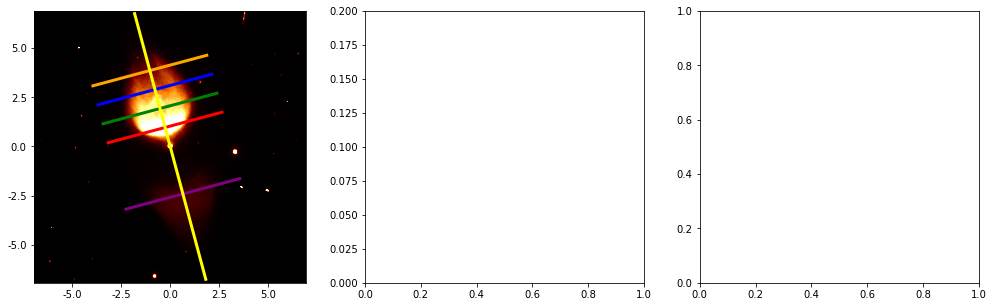

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

angular_size = 3

axes[0].imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], vmin = 0, vmax = 200, cmap = 'afmhot', origin = 'lower')

offset = -2

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'green', linewidth = 3)

offset = -3

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'blue', linewidth = 3)

offset = -4

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'orange', linewidth = 3)

offset = -1

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'red', linewidth = 3)

offset = 2.5

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'purple', linewidth = 3)

angular_size = 7

start_y = 150 + np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_y = 150 - np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
start_x = 150 + np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_x = 150 - np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)

axes[0].plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)

axes[0].set_aspect('equal', 'box')

# axes[0].axis('off')

axes[0].set_xticks(ticks = np.linspace(150 - 5 / (0.1013 / 2.196257815841434), 150 + 5 / (0.1013 / 2.196257815841434), 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(150 - 5 / (0.1013 / 2.196257815841434), 150 + 5 / (0.1013 / 2.196257815841434), 5), labels = np.around(np.linspace(-5, 5, 5), 2))

axes[1].set_ylim([0, 0.2])

axes[1].plot(x_hst, normalizedYHST[::-1], color = 'yellow', alpha = 1, linewidth = 3, label = 'HST')

axes[1].annotate("$\mathbf{central\ star}$\n$\mathbf{goes\ to\ 1}$", 
                 xy = (0.5, 0.14), 
                 fontsize = 12,
                 color = 'white')

# Draw the arrow separately using arrow
axes[1].arrow(3, 0.165, -1.5, 0.025, 
              head_width = 0.01, 
              head_length = 0.25, 
              fc = 'white', 
              ec = 'white')

axes[1].set_xlabel('Angular Offset From the Star (Arcseconds)')
axes[1].set_ylabel('Relative Brightness Compared to the Star')

# axes[1].set_aspect(np.max(x_hst) * 2 / 0.2, 'box')
axes[1].set_facecolor('black')

angular_size = 3

offset = -2

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = 'green')

offset = -3

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = 'blue')

offset = -4

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = 'orange')

offset = 2.5

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = 'purple')

offset = -1

start_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 200 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 200 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

y_array = skimage.measure.profile_line(data[center_x - 200 : center_x + 200, center_y - 200 : center_y + 200], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), -(len(y_array) - 1) / 2 * (0.1013 / 2.196257815841434), len(y_array))
axes[2].plot(x_array, y_array / 1897.2821350097656, color = 'red')

# axes[2].set_title("Brightness of the Equilateral Profiles Relative to Star")
axes[2].set_ylabel("Relative Brightness")
axes[2].set_xlabel("Horizontal Offset (Arcseconds)")
axes[2].set_facecolor('white')
fig.savefig('HST M1-92-profiles-display.png', dpi = 100)

In [ ]:
angular_size = 3

plt.imshow(data[center_x - 150 : center_x + 150, center_y - 150 : center_y + 150], vmin = 0, vmax = 350, cmap = 'afmhot', origin = 'lower')

offset = -2

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

plt.plot([start_x, end_x], [start_y, end_y], color = 'green', linewidth = 3)

offset = -3

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

plt.plot([start_x, end_x], [start_y, end_y], color = 'blue', linewidth = 3)

offset = -4

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

plt.plot([start_x, end_x], [start_y, end_y], color = 'orange', linewidth = 3)

offset = 2.5

start_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size + cos(angle_degrees * pi / 180) * angular_size / pixel_size
end_y = 150 - sin(angle_degrees * pi / 180) * offset / pixel_size - cos(angle_degrees * pi / 180) * angular_size / pixel_size
start_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size - sin(angle_degrees * pi / 180) * angular_size / pixel_size
end_x = 150 - cos(angle_degrees * pi / 180) * offset / pixel_size + sin(angle_degrees * pi / 180) * angular_size / pixel_size

plt.plot([start_x, end_x], [start_y, end_y], color = 'purple', linewidth = 3)

angular_size = 7

start_y = 150 + np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_y = 150 - np.sin(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
start_x = 150 + np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)
end_x = 150 - np.cos(angle_degrees * np.pi / 180) * angular_size / (0.1013 / 2.196257815841434)

plt.plot([start_x, end_x], [start_y, end_y], color = 'yellow', linewidth = 3)

plt.axis('off')
plt.show()

In [ ]:
end_x

In [ ]:
start_x

In [ ]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
plt.plot([8, 90], [9, 89], color = 'yellow', linewidth = 3)
offset = 4
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'orange', linewidth = 3)
offset = 3
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'blue', linewidth = 3)
offset = 2
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'green', linewidth = 3)
offset = -2.5
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'purple', linewidth = 3)
plt.xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.xlabel("Offset (arcseconds)")
plt.ylabel("Offset (arcseconds)")
plt.savefig('HST M1-92-with-profiles.png', dpi = 100)

In [ ]:
# END